In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import os, re, warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [4]:
# Upload your Tamil text file (e.g., 'tamil_movie_scripts.txt')
file_name = "tamil_movie_scripts.txt"

with open(file_name, "r", encoding="utf-8") as f:
    text = f.read()

print("✅ File loaded successfully!")
print("Total characters:", len(text))
print("\nSample text:\n")
print(text[:500])  


✅ File loaded successfully!
Total characters: 27372

Sample text:

(வீட்டுக்குள், விளக்கு மெதுவாக எரிகிறது)
குமார்: இது நம்ம வாழ்க்கையில ஒரு காதல் தருணம் தான்.
(அவன் கையால் கதவை அடிக்கிறான்)
மீனா: இது நம்ம வாழ்க்கையில ஒரு துக்கம் தருணம் தான்.
ரவி: இது நம்ம வாழ்க்கையில ஒரு துக்கம் தருணம் தான்.
மீனா: இது நம்ம வாழ்க்கையில ஒரு துக்கம் தருணம் தான்.
விஜய்: இது நம்ம வாழ்க்கையில ஒரு கோபம் தருணம் தான்.
(கடற்கரை பக்கம், அலைகள் மோதுகின்றன)
அனிதா: இது நம்ம வாழ்க்கையில ஒரு சந்தோஷம் தருணம் தான்.
சுமித்ரா: இது நம்ம வாழ்க்கையில ஒரு பயம் தருணம் தான்.
குமார்: இது நம்ம வாழ்க்கையி


In [5]:
# Clean and preprocess Tamil text
def clean_text(txt):
    txt = re.sub(r'\s+', ' ', txt)  # Remove extra spaces/newlines
    return txt.strip()

text = clean_text(text)
print(text[:500])

(வீட்டுக்குள், விளக்கு மெதுவாக எரிகிறது) குமார்: இது நம்ம வாழ்க்கையில ஒரு காதல் தருணம் தான். (அவன் கையால் கதவை அடிக்கிறான்) மீனா: இது நம்ம வாழ்க்கையில ஒரு துக்கம் தருணம் தான். ரவி: இது நம்ம வாழ்க்கையில ஒரு துக்கம் தருணம் தான். மீனா: இது நம்ம வாழ்க்கையில ஒரு துக்கம் தருணம் தான். விஜய்: இது நம்ம வாழ்க்கையில ஒரு கோபம் தருணம் தான். (கடற்கரை பக்கம், அலைகள் மோதுகின்றன) அனிதா: இது நம்ம வாழ்க்கையில ஒரு சந்தோஷம் தருணம் தான். சுமித்ரா: இது நம்ம வாழ்க்கையில ஒரு பயம் தருணம் தான். குமார்: இது நம்ம வாழ்க்கையி


In [6]:
# Tokenize text (word-level)
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts([text])

total_words = len(tokenizer.word_index) + 1
print("Total unique words:", total_words)

# Convert text to sequence of tokens
input_sequences = []
for line in text.split('.'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_sequences.append(n_gram_seq)

print("Total sequences:", len(input_sequences))

Total unique words: 61
Total sequences: 3554


In [7]:
# Pad sequences and prepare predictors + labels
max_seq_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre'))

X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

print("X shape:", X.shape, "y shape:", y.shape)

X shape: (3554, 16) y shape: (3554, 61)


In [8]:
# Build the LSTM Model
model = Sequential([
    Embedding(total_words, 256, input_length=max_seq_len-1),
    LSTM(512, return_sequences=True),
    Dropout(0.2),
    LSTM(512),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.1953 - loss: 3.0185
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.6216 - loss: 1.5999
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.6975 - loss: 1.0829
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 53s 2s/step - accuracy: 0.7096 - loss: 0.9896
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.7237 - loss: 0.9039
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7338 - loss: 0.8031
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7378 - loss: 0.7399
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7515 - loss: 0.6775
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.7625 - loss: 0.6279
Epoch 10/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7707 - loss: 0.5880
Epoch 11/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7836 - loss: 0.5573
Epoch 12/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7862 - lo

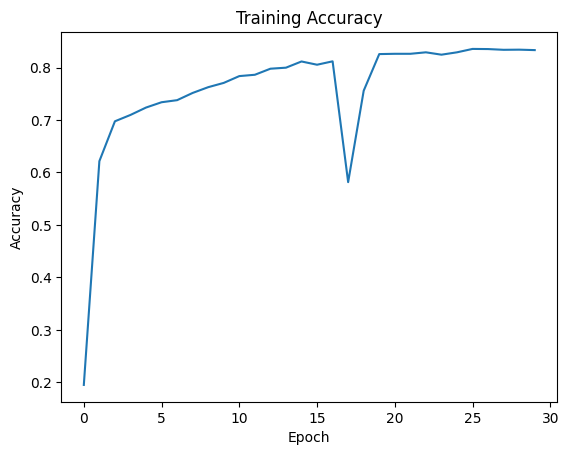

In [9]:
# Train the model (can take some time)
history = model.fit(X, y, epochs=30, batch_size=128, verbose=1)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [14]:
# Generate Tamil script text
def generate_text(seed_text, next_words=50, temperature=1.0):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted = np.asarray(predicted).astype('float64')
        predicted = np.log(predicted + 1e-8) / temperature
        exp_preds = np.exp(predicted)
        preds = exp_preds / np.sum(exp_preds)
        probas = np.random.multinomial(1, preds[0], 1)
        output_index = np.argmax(probas)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == output_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

# Example: generate a scene
seed_text = "ரவி"
generated = generate_text(seed_text, next_words=100, temperature=0.8)
print("Generated Scene:")
print(generated)

Generated Scene:
ரவி இது நம்ம வாழ்க்கையில ஒரு பயம் தருணம் தான் தான் கீழே கீழே கீழே கதவை குனிக்கிறான் குனிக்கிறான் கீழே துக்கம் காதல் தருணம் தருணம் தருணம் பேசுகின்றனர் குமார் இது நம்ம வாழ்க்கையில ஒரு கோபம் தருணம் தான் தான் கீழே தான் தான் தான் தான் தான் தான் தான் தருணம் தருணம் தான் தருணம் மாணவர்கள் சத்தமாக பேசுகின்றனர் விஜய் இது நம்ம வாழ்க்கையில ஒரு பயம் தருணம் தான் தான் தான் தான் தான் தான் துக்கம் தான் பயம் தான் கோபம் காதல் தருணம் தான் நடுவில் நடுவில் சத்தமாக பேசுகின்றனர் விஜய் இது நம்ம வாழ்க்கையில ஒரு துக்கம் தருணம் தான் தான் தான் தான் குனிக்கிறான் தான் கோபம் தான் தான் தான் கோபம் காதல் தருணம் தருணம் பார்க்கிறார்கள் அடிக்கிறான் விளக்கு விளக்கு மெதுவாக எரிகிறது குமார் நம்ம தலையை
